# Objective Predict Legend

# Import Data

In [1]:
import pandas as pd
import seaborn as sns
import altair as alt
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, fbeta_score, make_scorer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from collections import Counter

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import graphviz

In [2]:
df = pd.read_csv('Pokemon.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [3]:
df.sample(3)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False
425,384,Rayquaza,Dragon,Flying,680,105,150,90,150,90,95,3,True
316,292,Shedinja,Bug,Ghost,236,1,90,45,30,30,40,3,False


In [4]:
df.columns = df.columns.str.lower()
df.drop(columns='#', inplace=True)
df.rename(columns={'sp. atk':'sp_atk', 'sp. def':'sp_def','type 1':'type_1','type 2':'type_2'}, inplace=True)

<AxesSubplot:>

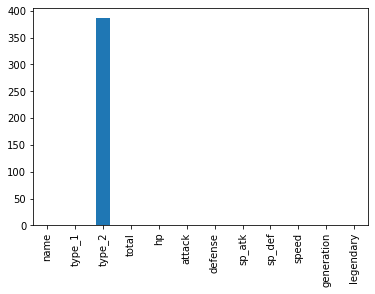

In [5]:
df.isnull().sum().plot.bar()

In [6]:
lb = LabelEncoder()
df['type'] = df['legendary'].apply(lambda x : 'legendary' if x == 1 else 'normal')
df['label'] = lb.fit_transform(df['legendary'])

In [7]:
df

,name,type_1,type_2,total,hp,attack,defense,sp_atk,sp_def,speed,generation,legendary,type,label
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,normal,0
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,normal,0
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,normal,0
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,normal,0
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,legendary,1
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,legendary,1
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,legendary,1
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,legendary,1


# EDA Pokemon Dataset

## Normal & Legendary

In [8]:
alt.Chart(df).mark_bar().encode(
    x = 'type',
    y = 'count(type)'
).properties(
    width=300,
    height=300
)

alt.Chart(...)

## Total: sum of all stats that come after this, a general guide to how strong a pokemon is

In [9]:
alt.Chart(df).mark_boxplot().encode(
    x = 'type:O', 
    y = 'total:Q'
).properties(
    width=300,
    height=300
)

alt.Chart(...)

## HP: hit points, or health, defines how much damage a pokemon can withstand before fainting

In [10]:
alt.Chart(df).mark_boxplot().encode(
    x = 'type:O',
    y = 'hp:Q'
).properties(
    width = 300,
    height = 300
)

alt.Chart(...)

## Attack: the base modifier for normal attacks (eg. Scratch, Punch)

In [11]:
alt.Chart(df).mark_boxplot().encode(
    x = 'type',
    y = 'attack'
).properties(
    width = 300, 
    height = 300
)

alt.Chart(...)

## Defense: the base damage resistance against normal attacks

In [12]:
alt.Chart(df).mark_boxplot().encode(
    x = 'type',
    y = 'defense'
).properties(
    width = 300, 
    height = 300
)

alt.Chart(...)

## SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)

In [13]:
alt.Chart(df).mark_boxplot().encode(
    x = 'type',
    y = 'sp_atk',
).properties(
    width = 300, 
    height = 300
)

alt.Chart(...)

## SP Def: the base damage resistance against special attacks

In [14]:
alt.Chart(df).mark_boxplot().encode(
    x = 'type',
    y = 'sp_def'
).properties(
    width = 300, 
    height = 300
)

alt.Chart(...)

## Speed: determines which pokemon attacks first each round

In [15]:
alt.Chart(df).mark_boxplot().encode(
    x = 'type:O',
    y = 'speed:Q'
).properties(
    width = 300, 
    height = 300
)

alt.Chart(...)

## Generation

In [16]:
alt.Chart(df[df['label']==1]).mark_bar().encode(
    x = 'generation:O', 
    y = 'count():Q',
    color = 'type:N' 
).properties(
    width = 300, 
    height = 300
)

alt.Chart(...)

## Type Pokemon

In [17]:
alt.Chart(df[df['label']==1]).mark_bar().encode(
    x = alt.X('type_1:O', sort ='-y'),
    y = alt.Y('count():Q')
).properties(
    height = 300, 
    width = 300
)

alt.Chart(...)

In [18]:
alt.Chart(df[df['label']==1]).mark_bar().encode(
    x = alt.X('type_2:O', sort ='-y'),
    y = alt.Y('count():Q')
).properties(
    height = 300, 
    width = 300
)

alt.Chart(...)

## Attack & Defense

In [19]:
a_d = alt.Chart(df).mark_point().encode(
    x = 'attack', 
    y = 'defense', 
    color = 'type'
)

m_defense = alt.Chart(df).mark_rule(color='red').encode(
    y='mean(defense):Q'
)

m_attack = alt.Chart(df).mark_rule(color='red').encode(
    x='mean(attack):Q'
)
(a_d + m_attack + m_defense).properties(
    width = 300, 
    height = 300
)

alt.LayerChart(...)

## Attack & SP Attack

In [20]:
a_d = alt.Chart(df).mark_point().encode(
    x = 'attack', 
    y = 'sp_atk', 
    color = 'type'
)

m_defense = alt.Chart(df).mark_rule(color='red').encode(
    y='mean(sp_atk):Q'
)

m_attack = alt.Chart(df).mark_rule(color='red').encode(
    x='mean(attack):Q'
)
(a_d + m_attack + m_defense).properties(
    width = 300, 
    height = 300
)

alt.LayerChart(...)

## Attack & SP Def

In [21]:
a_d = alt.Chart(df).mark_point().encode(
    x = 'attack', 
    y = 'sp_def', 
    color = 'type'
)

m_defense = alt.Chart(df).mark_rule(color='red').encode(
    y='mean(sp_def):Q'
)

m_attack = alt.Chart(df).mark_rule(color='red').encode(
    x='mean(attack):Q'
)
(a_d + m_attack + m_defense).properties(
    width = 300, 
    height = 300
)

alt.LayerChart(...)

## Attack & Speed

In [22]:
a_d = alt.Chart(df).mark_point().encode(
    x = 'attack', 
    y = 'speed', 
    color = 'type'
)

m_defense = alt.Chart(df).mark_rule(color='red').encode(
    y='mean(speed):Q'
)

m_attack = alt.Chart(df).mark_rule(color='red').encode(
    x='mean(attack):Q'
)
(a_d + m_attack + m_defense).properties(
    width = 300, 
    height = 300
)

alt.LayerChart(...)

## Defense & SP Attack

In [23]:
a_d = alt.Chart(df).mark_point().encode(
    x = 'defense', 
    y = 'sp_atk', 
    color = 'type'
)

m_defense = alt.Chart(df).mark_rule(color='red').encode(
    y='mean(sp_atk):Q'
)

m_attack = alt.Chart(df).mark_rule(color='red').encode(
    x='mean(defense):Q'
)
(a_d + m_attack + m_defense).properties(
    width = 300, 
    height = 300
)

alt.LayerChart(...)

## Defense & SP def

In [24]:
a_d = alt.Chart(df).mark_point().encode(
    x = 'defense', 
    y = 'sp_def', 
    color = 'type'
)

m_defense = alt.Chart(df).mark_rule(color='red').encode(
    y='mean(sp_def):Q'
)

m_attack = alt.Chart(df).mark_rule(color='red').encode(
    x='mean(defense):Q'
)
(a_d + m_attack + m_defense).properties(
    width = 300, 
    height = 300
)

alt.LayerChart(...)

## Defense & Speed

In [25]:
a_d = alt.Chart(df).mark_point().encode(
    x = 'defense', 
    y = 'speed', 
    color = 'type'
)

m_defense = alt.Chart(df).mark_rule(color='red').encode(
    y='mean(speed):Q'
)

m_attack = alt.Chart(df).mark_rule(color='red').encode(
    x='mean(defense):Q'
)
(a_d + m_attack + m_defense).properties(
    width = 300, 
    height = 300
)

alt.LayerChart(...)

## HP & Attack

In [26]:
a_d = alt.Chart(df).mark_point().encode(
    x = 'attack', 
    y = 'hp', 
    color = 'type'
)

m_defense = alt.Chart(df).mark_rule(color='red').encode(
    y='mean(hp):Q'
)

m_attack = alt.Chart(df).mark_rule(color='red').encode(
    x='mean(attack):Q'
)
(a_d + m_attack + m_defense).properties(
    width = 300, 
    height = 300
)

alt.LayerChart(...)

## HP & Defense

In [27]:
a_d = alt.Chart(df).mark_point().encode(
    x = 'defense', 
    y = 'hp', 
    color = 'type'
)

m_defense = alt.Chart(df).mark_rule(color='red').encode(
    y='mean(hp):Q'
)

m_attack = alt.Chart(df).mark_rule(color='red').encode(
    x='mean(defense):Q'
)
(a_d + m_attack + m_defense).properties(
    width = 300, 
    height = 300
)

alt.LayerChart(...)

# Prep data to Model 

In [28]:
df['type_2']=df['type_2'].fillna('not')
df_m = df.copy()
df_m.drop(columns=['label','type','legendary'], inplace=True)
df_m=pd.get_dummies(df_m)
df_m['label'] = df.label

In [53]:
train , test = train_test_split(df_m, test_size=0.2, random_state=21)
X = train.drop(columns=['label'])
y = train.label
X_train , X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=21)

X_test = test.drop(columns=['label'])
y_test = test.label

# Rule Base

In [30]:
def rule_base(df):
    if (df['total'] > 498) and (df['hp'] > 79.5) and (df['attack'] > 95) and (df['defense'] > 85) and (df['sp_atk'] > 85) and (df['sp_def'] > 85) and (df['speed'] > 85):
        return 1
    else :
        return 0

In [31]:
y_pred_r = X_valid.apply(rule_base, axis=1)
print(confusion_matrix(y_valid, y_pred_r))
print(classification_report(y_valid, y_pred_r))

[[114   1]
 [  8   5]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       115
           1       0.83      0.38      0.53        13

    accuracy                           0.93       128
   macro avg       0.88      0.69      0.74       128
weighted avg       0.92      0.93      0.92       128



# Machine Learning 

## Oversampling

In [32]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_train, y_train = oversample.fit_resample(X_train, y_train)
print(Counter(y_train))

Counter({0: 476, 1: 476})


## Decision Tree

In [33]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_valid)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       115
           1       0.73      0.62      0.67        13

    accuracy                           0.94       128
   macro avg       0.84      0.79      0.82       128
weighted avg       0.93      0.94      0.94       128



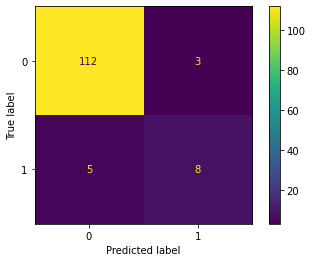

In [34]:
plot_confusion_matrix(dt, X_valid, y_valid)
print(classification_report(y_valid,y_pred_dt))

<AxesSubplot:>

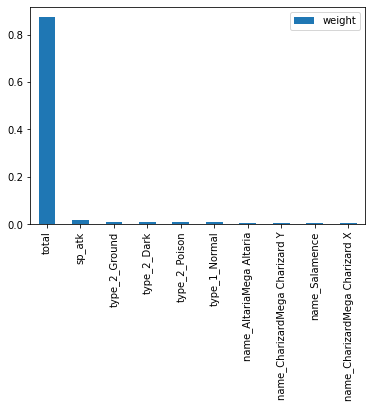

In [35]:
pd.DataFrame(dt.feature_importances_, X_train.columns,columns=['weight']).sort_values('weight', ascending=False).head(10).plot.bar()

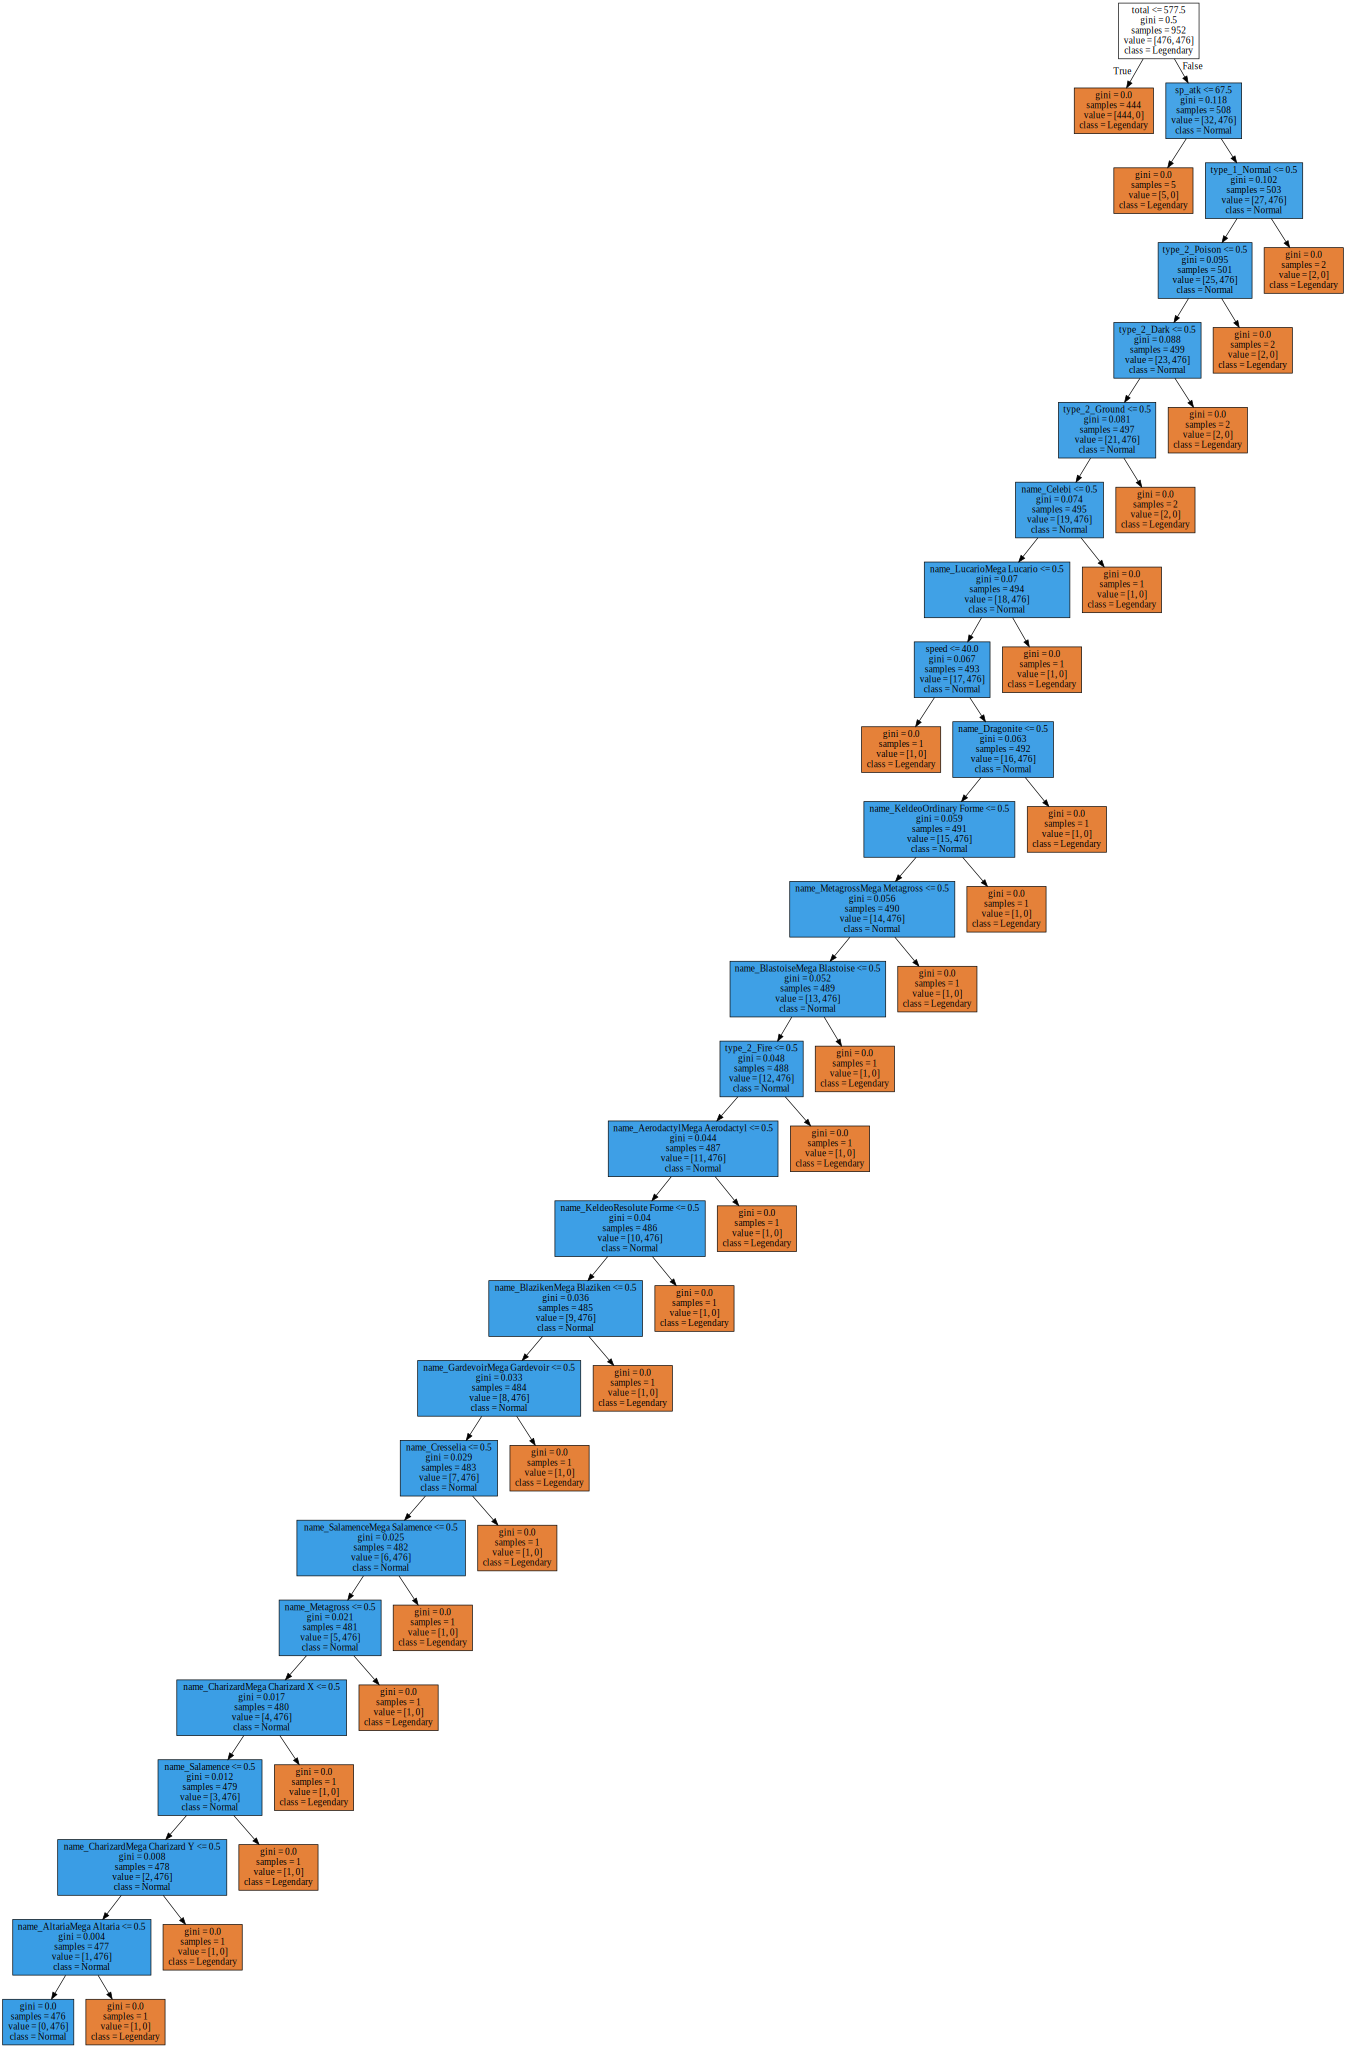

In [36]:
dot_data = tree.export_graphviz(
                                dt, out_file=None, 
                                feature_names=X.columns,
                                class_names=['Legendary','Normal'], 
                                filled=True
                                    ) 
graph = graphviz.Source(dot_data) 
graph 

In [37]:
np.random.seed(2)

param_dt = {'max_depth': np.random.choice(20,10, replace=False),
            'min_samples_split' : np.random.uniform(0,1,10), 
            'min_samples_leaf' : np.random.uniform(0,0.5,10), 
            'min_weight_fraction_leaf' : np.random.uniform(0,0.5,10), 
            }

ftwo_score = make_scorer(fbeta_score, beta=2)

In [38]:
dt_h = DecisionTreeClassifier(random_state=1)
dt_hyp = RandomizedSearchCV(dt_h, param_distributions = param_dt, random_state=1, cv=10, scoring=ftwo_score)
dt_hyp.fit(train.drop(columns='label'),train.label)

/Users/teerapong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/teerapong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/teerapong/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/teerapong/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 286, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/teerapong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Esti

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1),
                   param_distributions={'max_depth': array([12,  4, 18,  0,  9,  5,  3, 10,  1, 17]),
                                        'min_samples_leaf': array([0.03264325, 0.21406116, 0.04826546, 0.06357999, 0.29837265,
       0.113006  , 0.05347284, 0.1101531 , 0.17491314, 0.23389374]),
                                        'min_samples_split': array([0.52914209, 0.13457995, 0.51357812, 0.18443987, 0.78533515,
       0.85397529, 0.49423684, 0.84656149, 0.07964548, 0.50524609]),
                                        'min_weight_fraction_leaf': array([0.10087161, 0.32020336, 0.24153492, 0.25261836, 0.19344633,
       0.39681873, 0.29000209, 0.0811493 , 0.35037617, 0.48227554])},
                   random_state=1, scoring=make_scorer(fbeta_score, beta=2))

In [39]:
dt_hyp.best_estimator_

DecisionTreeClassifier(max_depth=12, min_samples_leaf=0.04826545783030628,
                       min_samples_split=0.18443986564691528,
                       min_weight_fraction_leaf=0.39681872722078854,
                       random_state=1)

In [40]:
dt_h = DecisionTreeClassifier(max_depth=12, min_samples_leaf=0.04826545783030628,
                       min_samples_split=0.18443986564691528,
                       min_weight_fraction_leaf=0.39681872722078854,
                       random_state=1)
dt_h.fit(X_train,y_train)
y_pred_dt_h = dt.predict(X_valid)

In [41]:
print(confusion_matrix(y_valid,y_pred_dt_h))
print(classification_report(y_valid,y_pred_dt_h))

[[112   3]
 [  5   8]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       115
           1       0.73      0.62      0.67        13

    accuracy                           0.94       128
   macro avg       0.84      0.79      0.82       128
weighted avg       0.93      0.94      0.94       128



<AxesSubplot:>

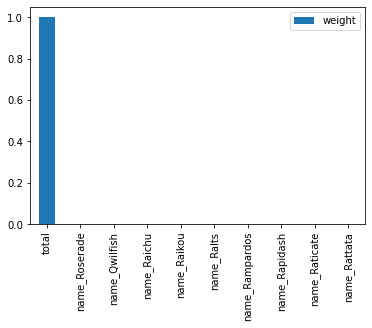

In [42]:
pd.DataFrame(dt_h.feature_importances_, X_train.columns,columns=['weight']).sort_values('weight', ascending=False).head(10).plot.bar()

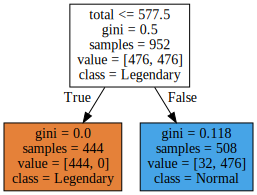

In [43]:
dot_data = tree.export_graphviz(
                                dt_h, out_file=None, 
                                feature_names=X.columns,
                                class_names=['Legendary','Normal'], 
                                filled=True
                                    ) 
graph = graphviz.Source(dot_data) 
graph 

## Random Forest

In [44]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_valid)

In [45]:
print(confusion_matrix(y_valid,y_pred_rf))
print(classification_report(y_valid,y_pred_rf))

[[114   1]
 [  4   9]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       115
           1       0.90      0.69      0.78        13

    accuracy                           0.96       128
   macro avg       0.93      0.84      0.88       128
weighted avg       0.96      0.96      0.96       128



<AxesSubplot:>

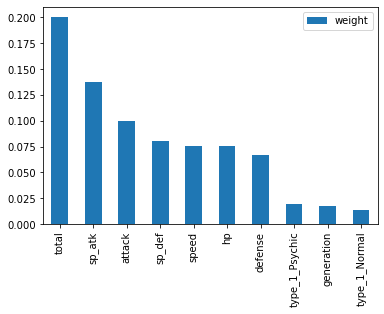

In [46]:
pd.DataFrame(rf.feature_importances_, X_train.columns,columns=['weight']).sort_values('weight',ascending=False).head(10).plot.bar()

In [47]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_rf = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [48]:
rf_h = RandomizedSearchCV(rf, param_distributions=random_rf, random_state=1, cv=10, scoring=ftwo_score)
rf_h.fit(train.drop(columns='label'),train.label)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=1, scoring=make_scorer(fbeta_score, beta=2))

In [49]:
rf_h.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=40, max_features='sqrt',
                       n_estimators=1600, random_state=1)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       115
           1       0.90      0.69      0.78        13

    accuracy                           0.96       128
   macro avg       0.93      0.84      0.88       128
weighted avg       0.96      0.96      0.96       128



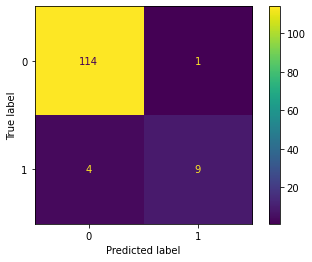

In [52]:
y_pred_bh = rf_h.predict(X_valid)

plot_confusion_matrix(rf_h, X_valid, y_valid)
print(classification_report(y_valid,y_pred_bh))

<AxesSubplot:>

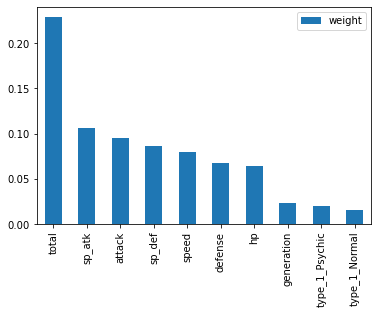

In [51]:
pd.DataFrame(rf_h.feature_importances_, X_train.columns,columns=['weight']).sort_values('weight',ascending=False).head(10).plot.bar()

# Test set: Pokemon

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       144
           1       0.82      0.56      0.67        16

    accuracy                           0.94       160
   macro avg       0.89      0.77      0.82       160
weighted avg       0.94      0.94      0.94       160



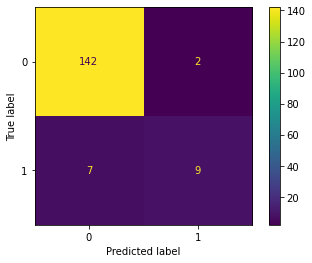

In [57]:
y_pred_test = rf_h.predict(X_test)

plot_confusion_matrix(rf_h, X_test, y_test)
print(classification_report(y_test,y_pred_test))